In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-whitegrid')
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'


In [2]:
def plots(methods, folder, offset, epochs = 200, tests = "", trainloader_len=281, plot_legend_in=True):
    for m in methods:
        temp = np.empty((3, epochs), np.float64)
        for i in range(3):
            t = np.array([])
            with open('./output_data/data_plots/' + folder +'/'+m + '_' +str(i+offset)+tests+'.csv') as f:
                for l in f:
                    t = np.append(t, float(l))
            if "kaiming" in m and not("cifar" in m):
                t = np.true_divide(t, 281)
            else:
                t = np.true_divide(t, trainloader_len)
            temp[i] = t
        label = m[5:] if "cifar" in m else m
        label = label.replace("_", " ")
        label = label.replace("M", "")
        mean = np.mean(temp, axis=0)
        plt.plot(range(epochs), mean, label=label)
        

    # plt.grid()
    plt.xlabel("Epoka")
    plt.ylabel("Wartość funkcji celu")
    if plot_legend_in:
        legend = plt.legend(loc='best', framealpha=1, facecolor='white', frameon=True)
    else:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.title(label=title, pad=20.0)
    plt.show()


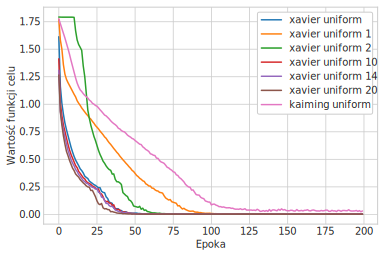

In [3]:
methods_intel = ["xavier_uniform", "xavier_uniform_M_1", "xavier_uniform_M_2", "xavier_uniform_M_10", "xavier_uniform_M_14", "xavier_uniform_M_20", "kaiming_uniform"]
plots(methods=methods_intel, folder="relu", offset=10, trainloader_len=1404)

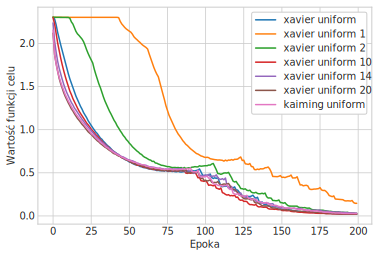

In [17]:
methods_cifar = ["cifarxavier_uniform", "cifarxavier_uniform_M_1", "cifarxavier_uniform_M_2", "cifarxavier_uniform_M_10", "cifarxavier_uniform_M_14", "cifarxavier_uniform_M_20", "cifarkaiming_uniform"]
plots(methods=methods_cifar, folder="relu", offset=10, trainloader_len=500)


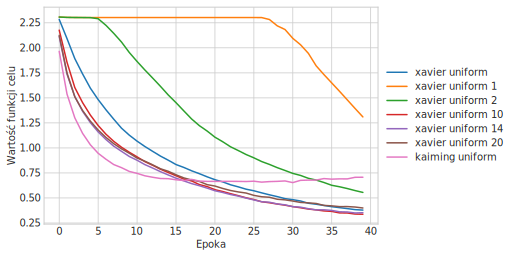

In [23]:
methods_cifar = ["cifarxavier_uniform", "cifarxavier_uniform_M_1", "cifarxavier_uniform_M_2", "cifarxavier_uniform_M_10", "cifarxavier_uniform_M_14", "cifarxavier_uniform_M_20", "cifarkaiming_uniform"]
plots(methods=methods_cifar, folder="tanh", offset=0, epochs = 40, trainloader_len=500, plot_legend_in=False)


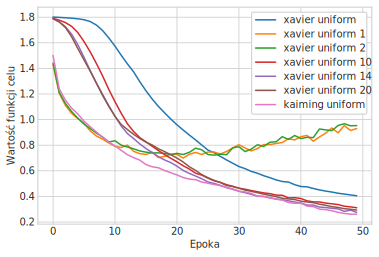

In [21]:
methods_intel = ["xavier_uniform", "xavier_uniform_M_1", "xavier_uniform_M_2", "xavier_uniform_M_10", "xavier_uniform_M_14", "xavier_uniform_M_20", "kaiming_uniform"]

plots(methods=methods_intel, folder="tanh", offset=3, epochs = 50, trainloader_len=281)


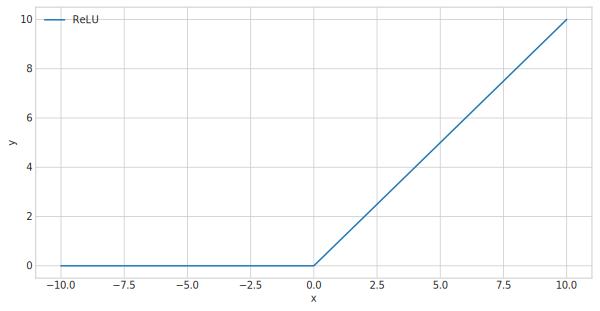

In [21]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['ReLU'])
plt.xlabel("x")
plt.ylabel("y")
plt.style.use('seaborn-whitegrid')
plt.show()


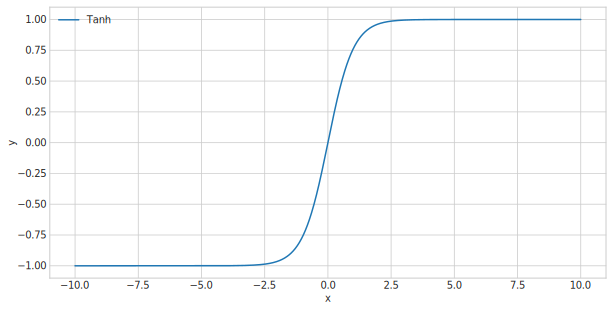

In [22]:
x = np.linspace(-10, 10, 1000)
y = (2 / (1 + np.exp(-2*x))) - 1


plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Tanh'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()



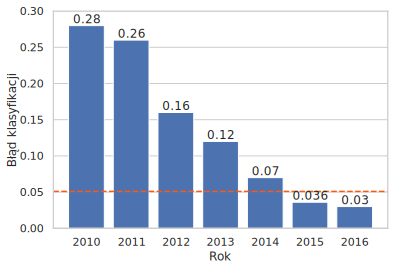

In [28]:
results = [0.28, 0.26, 0.16, 0.12, 0.07, 0.036, 0.03]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
human = 5.1
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
bars = ax.bar(years, results)
# ax.legend([''])
plt.xlabel("Rok")
plt.ylabel("Błąd klasyfikacji")
ax.bar_label(bars, results, padding=0)
ax.grid(axis='x')
plt.ylim(0, 0.3)
plt.axhline(y = 0.051, color = '#fc5812', linestyle = 'dashed', label = "błąd człowieka")
plt.show()
